###  <font color='Blue'> **Julia set mod**<br><b>

**Project Description**

"Julia set" is a set on the complex plane. Generation and visualization of this set and its modifications.

My task is to study the Julia set generation formulas, make a function, select a charmingly beautiful combination, visualize in matplotlib, visualize in good quality in Tableau.

* General information about the Julia set: https://en.wikipedia.org/wiki/Julia_set
* Python reference code: https://blbadger.github.io/julia-sets

**My final modified visualizations in Tableau:**

<font color='Orange'>**1. Julia set, mod: Chinese dragon**<br><b> https://public.tableau.com/app/profile/alexander2244/viz/JuliasetmodChinesedragon/Julia_set_mod

<font color='Blue'>**2. Julia set, mod: frost**<br><b> https://public.tableau.com/app/profile/alexander2244/viz/Juliasetmodfrost/Julia_set_mod

3. And below in matplotlib, the palette is slightly different

**Historical reference**

Gaston Maurice Julia (French Gaston Maurice Julia; February 3, 1893, Sidi Bel Abbes, Algeria - March 1, 1978, Paris, France) - French mathematician who discovered the Julia set. In the 1970s, his work was popularized by Benoit Mandelbrot of IBM. Julia participated on the side of France in the First World War, where he mutilated his nose; numerous operations to correct the situation were unsuccessful, so he wore a leather bandage on his face for the rest of his life.

<p style="text-align:center;"> Gaston Julia (right) with Gustav Herglotz (left) and 2 dogs </p>

<img src='https://upload.wikimedia.org/wikipedia/commons/4/45/Gustav_Herglotz%2C_Gaston_Julia.jpeg' width=500, heigth=350>


Formula for calculating the set:

$f_a(z) = z^2 + a$,

Where:
   * $a$ - fixed complex number (example: a = -0.70176 + 0.3842*j),
   * $z$ is a complex number (z = x + y*j), where x,y are real numbers, j is the minimum unit.

**Project goals:**

1. Study the Julia set generation formulas, create a function;
2. Select a charmingly beautiful combination of parameters and color palette, generate a variety;
3. Visualize the set first in matplotlib;
4. Save this set in fairly good quality, but not slow it down;
5. Visualize this in Tableau as Art.

## 1) Importing libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
# Install a dark theme for charts
plt.style.use('dark_background')

## 2) Function for generating Julia set

In [1]:
def julia_set(h_range,
              w_range,
              max_iterations,
              cX,
              cY):
    '''Function for determining the values of the Julia set. Accepts
     the array sizes given by h_range and w_range, in pixels, and
     the maximum number of iterations for generation. Returns an array,
     containing the number of the last bounded iteration for each array value.
    '''
    # Create a grid of complex numbers for given ranges
    y, x = np.ogrid[-1.0:1.0:h_range*1j, -1.5:1.5:w_range*1j]

    # Initialize an array of complex numbers
    z_array = x + y*1j # 1j - imaginary unit

    # Set the constant a for the Julia set
    a = cX + cY*1j

    # Create an array to store the number of iterations until divergence
    iterations_till_divergence = max_iterations + np.zeros(z_array.shape)

    # Loop through each point in the array
    for h in range(h_range):
        for w in range(w_range):
            z = z_array[h][w]  # Get the current z value for a given point
             # Check each point for the number of iterations until
            for i in range(max_iterations):
                z = z**2 + a  # Recalculate the value of z using the Julia set formula
                # If the value goes beyond a certain limit, stop
                if z * np.conj(z) > 4:
                    iterations_till_divergence[h][w] = i  # Save the number of iterations
                    break  # Break the loop because the value diverges

    return iterations_till_divergence

## 3) Julia set: classic

<img src='https://memepedia.ru/wp-content/uploads/2018/09/2fb0e0593a6a0a07de957de7bf14fe3b.jpg' width=350, heigth=350>

In [3]:
# let's generate a set for classical parameters
# cX, cY = -0.7, 0.27015
julia_set_classic = julia_set(1000, 1500, 1000, -0.7, 0.27015)

In [4]:
# look at the min and max values
print(np.min(julia_set_classic))
print(np.max(julia_set_classic))

0.0
1000.0


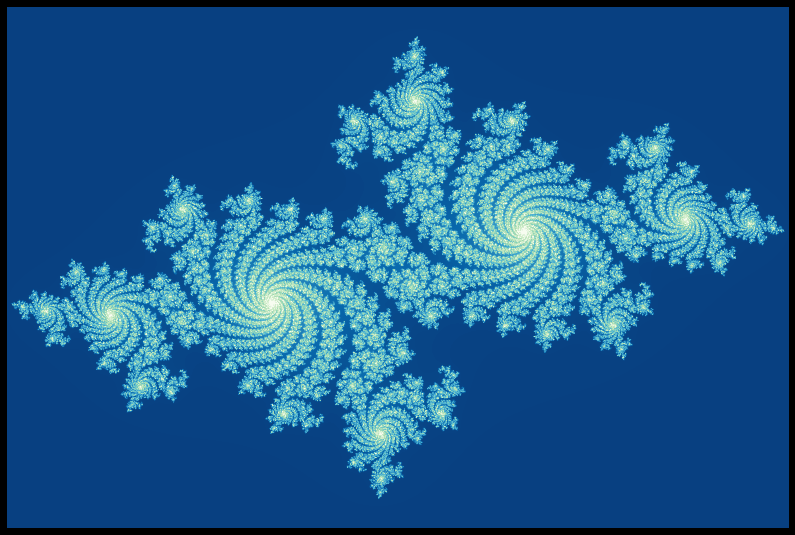

In [5]:
# Displaying an image of a set
plt.figure(figsize=(14, 12))
plt.imshow(julia_set_classic, cmap='GnBu_r', vmax=700) #, vmin=0, vmax=80 GnBu_r gist_earth
plt.axis('off')
plt.show()

## 4) Julia set, mod: frost

In [6]:
# Let's generate a set for modification Julia set, mod: frost
# cX, cY = -0.70176, 0.3842
julia_set_frost = julia_set(1000, 1500, 1000, -0.70176, 0.3842)

In [7]:
# look at the min and max values
print(np.min(julia_set_frost))
print(np.max(julia_set_frost))

0.0
194.0


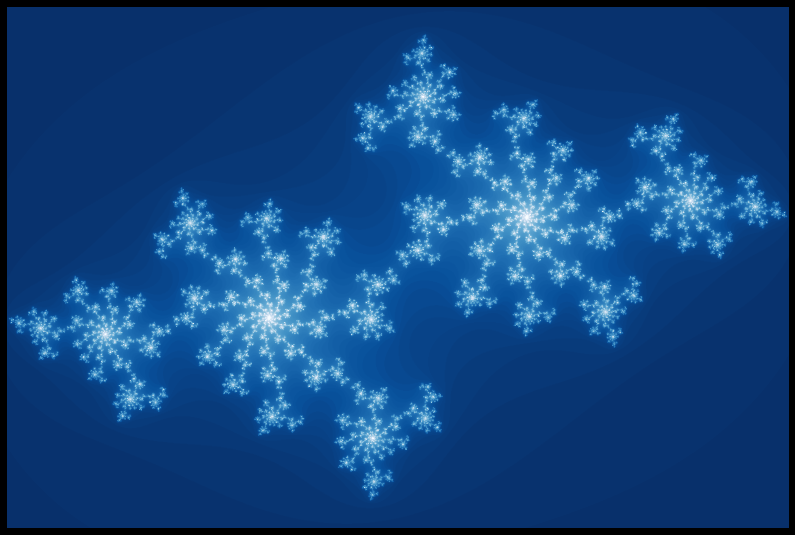

In [8]:
# Displaying an image of a set
plt.figure(figsize=(14, 12))
plt.imshow(julia_set_frost, cmap='Blues_r', vmin=0, vmax=90)
plt.axis('off')
plt.show()

In [9]:
# let's create more points for visualization in good quality in Tableau
julia_set_frost2 = julia_set(2000, 3000, 100000, -0.70176, 0.3842)

In [10]:
# look at the min and max values
print(np.min(julia_set_frost2))
print(np.max(julia_set_frost2))

0.0
220.0


In [11]:
# create a DataFrame from the function results
df1 = pd.DataFrame(julia_set_frost2,
                   columns=[f'X_{i}' for i in range(julia_set_frost2.shape[1])])
# let's check the size
print(df1.shape)

(2000, 3000)


In [12]:
# convert to long format using stack()
df1_long = df1.stack().reset_index()

# rename columns
df1_long.columns = ['Y', 'X', 'Value']

# make a column marker with a specific value
#df1_long['Fill'] = np.where(df1_long['Value'] > 36, 'Fill', 'Not')

display(df1_long.head())

,Y,X,Value
0,0,X_0,0.0
1,0,X_1,0.0
2,0,X_2,0.0
3,0,X_3,0.0
4,0,X_4,0.0


In [13]:
# saving DataFrame to csv file
df1_long.to_csv('julia_set_1_long.csv', index=False)

## 5) Julia set, mod: Chinese dragon

In [14]:
# let's generate a set for modification Julia set, mod: Chinese dragon
# cX, cY = -0.8, 0.156
julia_set_chinese_dragon = julia_set(1000, 1500, 1000, -0.8, 0.156)

In [15]:
# look at the min and max values
print(np.min(julia_set_chinese_dragon))
print(np.max(julia_set_chinese_dragon))

0.0
1000.0


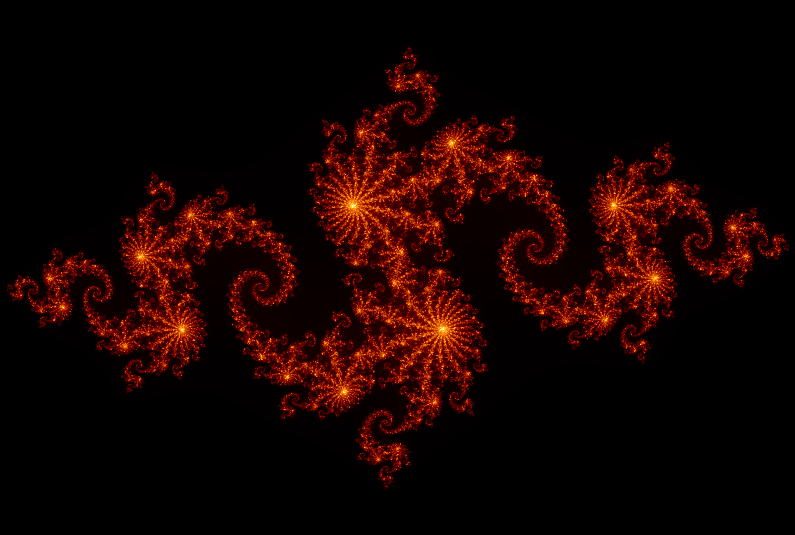

In [16]:
# Displaying an image of a set
plt.figure(figsize=(14, 12))
plt.imshow(julia_set_chinese_dragon, cmap='afmhot', vmin=0, vmax=900) # afmhot Reds_r
plt.axis('off')
plt.show()

In [17]:
# let's create more points for visualization in good quality in Tableau
julia_set_chinese_dragon2 = julia_set(2000, 3000, 100000, -0.8, 0.156)

In [18]:
# look at the min and max values
print(np.min(julia_set_chinese_dragon2))
print(np.max(julia_set_chinese_dragon2))

0.0
2226.0


In [19]:
# create a DataFrame from the function results
df2 = pd.DataFrame(julia_set_chinese_dragon2,
                    columns=[f'X_{i}' for i in range(julia_set_frost2.shape[1])])
# check the size
print(df1.shape)

(2000, 3000)


In [20]:
# convert to long format using stack()
df2_long = df1.stack().reset_index()

# rename columns
df2_long.columns = ['Y', 'X', 'Value']

# make a column marker with a specific value
#df2_long['Fill'] = np.where(df2_long['Value'] > 36, 'Fill', 'Not')

display(df2_long.head())

,Y,X,Value
0,0,X_0,0.0
1,0,X_1,0.0
2,0,X_2,0.0
3,0,X_3,0.0
4,0,X_4,0.0


In [21]:
# saving DataFrame to csv file
df2_long.to_csv('julia_set_1_long2.csv', index=False)

## 6) Julia set, mod: frost2

Немного изменим сетку комплексных чисел, сделаем её квадратной

In [22]:
def julia_set2(h_range,
              w_range,
              max_iterations,
              cX,
              cY):
    '''Function for determining the values of the Julia set. Accepts
     the array sizes given by h_range and w_range, in pixels, and
     the maximum number of iterations for testing. Returns an array,
     containing the number of the last bounded iteration for each array value.
    '''
    # Create a grid of complex numbers for given ranges
    y, x = np.ogrid[-1.5:1.5:h_range*1j, -1.5:1.5:w_range*1j]

    # Initialize an array of complex numbers
    z_array = x + y*1j

    # Set the constant a for the Julia set
    a = cX + cY*1j

    # Create an array to store the number of iterations until divergence
    iterations_till_divergence = max_iterations + np.zeros(z_array.shape)

    # Loop through each point in the array
    for h in range(h_range):
        for w in range(w_range):
            z = z_array[h][w]  # Get the current z value for a given point
            # Check each point for the number of iterations until divergence
            for i in range(max_iterations):
                z = z**2 + a  # Recalculate the value of z using the Julia set formula
                # If the value goes beyond a certain limit, stop
                if z * np.conj(z) > 4:
                    iterations_till_divergence[h][w] = i  # Save the number of iterations
                    break  # Break the loop because the value diverges

    return iterations_till_divergence

In [23]:
# let's generate a set for modification Julia set, mod: frost
# cX, cY = 0.4, 0.4
julia_set_snowflake = julia_set2(1500, 1500, 1000, 0.4, 0.4)

In [24]:
# look at the min and max values
print(np.min(julia_set_snowflake))
print(np.max(julia_set_snowflake))

0.0
123.0


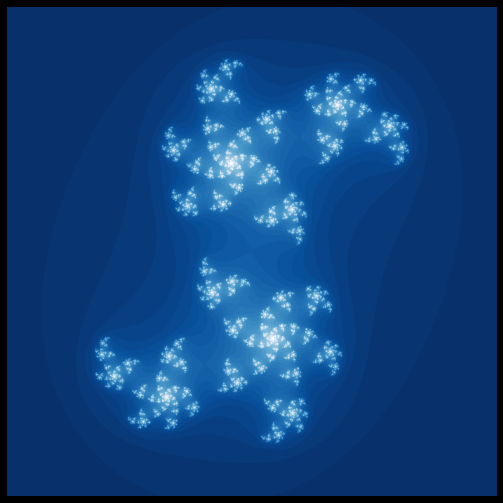

In [27]:
# Displaying an image of a set
plt.figure(figsize=(9, 9))
plt.imshow(julia_set_snowflake, cmap='Blues_r', vmin=0, vmax=50)
plt.axis('off')
plt.show()

## 7) Conclusion

The results were charming pictures ✨, I visualized them in advance in matplotlib, saved some of them in good quality, you can see links to visualization in Tableau at the beginning of the project.